<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #10</h2>
<h3 align="center">23 Mar 2023</h3>



## Reading and writing data



Although `read_csv` and `read_table` are the most commonly used, a number of other functions are available

-   `read_fwf`
-   `read_parquet`
-   `read_excel`
-   `read_hdf`
-   `read_html`
-   `read_json`
-   `read_pickle`
-   `read_sql`

Optional arguments for these functions fall into categories:

-   Indexing
-   Type inference and data conversion
-   Datetime parsing
-   Iterating
-   Unclean data



## Web scraping



-   Python has many libraries to read HTML and XML formats
-   Examples include `lxml`, `Beautiful Soup`, and `html5lib`
-   `lxml` is usually faster but the other libraries can better handle malformed files
    
    Let's install the necessary libraries



In [87]:
%conda install -y lxml beautifulsoup4

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ ^C

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

## ☛ Hands-on exercises



### Downloading and parsing water quality data



Head over to the National Water Information System ([https://waterdata.usgs.gov/nwis/rt](https://waterdata.usgs.gov/nwis/rt)) and find a station with available water temperature and turbidity data



In [88]:
url = "https://nwis.waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00060=on&cb_00065=on&cb_00300=on&format=html&site_no=01161280&legacy=&period=&begin_date=2022-03-01&end_date=2023-03-28"

Is there a function to read the data? What is the result?



In [89]:
data = pd.read_html(url)
data

[                                                   0
 0  This gage is monitored in cooperation with the...,
                             0   1
 0  Click for Time-lapse Video NaN,
                      0
 0  Boating safety tips,
     Unnamed: 0                             Available Parameters  \
 0          NaN        All 11 Available Parameters for this site   
 1          NaN                         00010 Temperature, water   
 2          NaN  00060 Discharge [Discharge from Index Velocity]   
 3          NaN                                00065 Gage height   
 4          NaN                       00095 Specific cond at 25C   
 5          NaN                           00300 Dissolved oxygen   
 6          NaN                 00301 Diss oxygen,%saturtn [(2)]   
 7          NaN                                         00400 pH   
 8          NaN                       32295 fDOM, water, in situ   
 9          NaN                       63680 Turbidity, Form Neph   
 10         NaN        

In [90]:
len(data)

6

Can you extract a `DataFrame`?



In [91]:
data = data[4]
data.head()

,Date / Time,"Gageheight, feet,","Dis-charge, ft3/s,[DischargefromIndexVelocity]"
0,03/01/2022 00:00 EST,13.42P,"15,700P"
1,03/01/2022 00:05 EST,13.43P,NaN
2,03/01/2022 00:10 EST,13.44P,NaN
3,03/01/2022 00:15 EST,13.44P,"15,900P"
4,03/01/2022 00:20 EST,13.45P,NaN


What is the index of this `DataFrame`?



In [92]:
data.index

RangeIndex(start=0, stop=90706, step=1)

Pick an appropriate index for your data



In [53]:
data.set_index('Date / Time')

,"Gageheight, feet,","Dis-charge, ft3/s,[DischargefromIndexVelocity]"
Date / Time,,
03/01/2022 00:00 EST,13.42P,"15,700P"
03/01/2022 00:05 EST,13.43P,NaN
03/01/2022 00:10 EST,13.44P,NaN
03/01/2022 00:15 EST,13.44P,"15,900P"
03/01/2022 00:20 EST,13.45P,NaN
...,...,...
03/28/2023 08:00 EDT,12.93P,"19,100P"
03/28/2023 08:15 EDT,12.96P,"19,300P"
03/28/2023 08:30 EDT,12.98P,"18,900P"


Look at the documentation for `read_html`. Are there any arguments that you can use to ease the indexing etc.?



In [93]:
data = pd.read_html(url, match='Date', index_col=0, parse_dates=True)[0]
data.head()

,"Gageheight, feet,","Dis-charge, ft3/s,[DischargefromIndexVelocity]"
Date / Time,,
2022-03-01 00:00:00-05:00,13.42P,"15,700P"
2022-03-01 00:05:00-05:00,13.43P,NaN
2022-03-01 00:10:00-05:00,13.44P,NaN
2022-03-01 00:15:00-05:00,13.44P,"15,900P"
2022-03-01 00:20:00-05:00,13.45P,NaN


Notice the column headers are hyphenated. Let's get rid of the `-`!



In [94]:
data.columns

Index(['Gageheight, feet,', 'Dis-charge, ft3/s,[DischargefromIndexVelocity]'], dtype='object')

In [95]:
col = data.columns[1]
data.rename(columns={col: col.replace("-", "")}, inplace=True)

In [96]:
data

,"Gageheight, feet,","Discharge, ft3/s,[DischargefromIndexVelocity]"
Date / Time,,
2022-03-01 00:00:00-05:00,13.42P,"15,700P"
2022-03-01 00:05:00-05:00,13.43P,NaN
2022-03-01 00:10:00-05:00,13.44P,NaN
2022-03-01 00:15:00-05:00,13.44P,"15,900P"
2022-03-01 00:20:00-05:00,13.45P,NaN
...,...,...
2023-03-28 09:00:00-04:00,13.02P,"19,000P"
2023-03-28 09:15:00-04:00,12.99P,"19,800P"
2023-03-28 09:30:00-04:00,13.05P,"20,200P"


Calculate the mean of each variable



In [98]:
data.dtypes

Gageheight, feet,                                object
Discharge, ft3/s,[DischargefromIndexVelocity]    object
dtype: object

In [97]:
data.mean()

/var/folders/rf/1h241_b50s3cvb1mz4lcxrx80000gn/T/ipykernel_39985/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Series([], dtype: float64)

Did we get the answer that we expected? If not, why?

-   Missing data?
-   Malformed data values?



Look at the first element of the `Discharge, ft3/s,[DischargefromIndexVelocity]` column



In [99]:
data['Discharge, ft3/s,[DischargefromIndexVelocity]'][0]

'15,700P'

What is its type?



In [100]:
type(data['Discharge, ft3/s,[DischargefromIndexVelocity]'][0])

str

Let's fix that!



In [106]:
def extract(s):
    if type(s) == 'float':
        return s
    else:
        return float(s[:-1].replace(',', ''))

In [104]:
q = data['Discharge, ft3/s,[DischargefromIndexVelocity]']
q.map(lambda s: float(s[:-1].replace(",", "")))

TypeError: 'float' object is not subscriptable

In [105]:
# first extract the numeric characters
q = data['Discharge, ft3/s,[DischargefromIndexVelocity]'].str.extract('(\d+\,\d+)', expand=False)
# then replace the commas and convert to float
q = q.str.replace(',', '').astype('float32')
q.head()

Date / Time
2022-03-01 00:00:00-05:00    15700.0
2022-03-01 00:05:00-05:00        NaN
2022-03-01 00:10:00-05:00        NaN
2022-03-01 00:15:00-05:00    15900.0
2022-03-01 00:20:00-05:00        NaN
Name: Discharge, ft3/s,[DischargefromIndexVelocity], dtype: float32

In [107]:
h = data['Gageheight, feet,'].str.extract('(\d+\.\d+)', expand=False)
h = h.astype('float32')
h.head()

Date / Time
2022-03-01 00:00:00-05:00    13.42
2022-03-01 00:05:00-05:00    13.43
2022-03-01 00:10:00-05:00    13.44
2022-03-01 00:15:00-05:00    13.44
2022-03-01 00:20:00-05:00    13.45
Name: Gageheight, feet,, dtype: float32

Now let's try the mean calculation again



In [108]:
data['Discharge, ft3/s,[DischargefromIndexVelocity]'] = q
data['Gageheight, feet,'] = h
data.mean()

Gageheight, feet,                                   12.464304
Discharge, ft3/s,[DischargefromIndexVelocity]    11465.227539
dtype: float32

Count the days with missing data for each column



In [82]:
(~data.notna()).sum()

Gageheight, feet,                                  507
Discharge, ft3/s,[DischargefromIndexVelocity]    54261
dtype: int64

Find the dates when we have missing data for gage height


In [83]:
data.index[~data['Gageheight, feet,'].notna()]

DatetimeIndex(['2022-03-02 12:14:00-05:00', '2022-03-02 12:16:00-05:00',
               '2022-03-02 12:17:00-05:00', '2022-03-02 12:18:00-05:00',
               '2022-03-02 12:19:00-05:00', '2022-03-02 12:21:00-05:00',
               '2022-03-02 12:22:00-05:00', '2022-03-02 12:23:00-05:00',
               '2022-03-02 12:24:00-05:00', '2022-03-02 12:26:00-05:00',
               ...
               '2022-11-29 13:58:00-05:00', '2022-11-29 13:59:00-05:00',
               '2022-11-29 14:01:00-05:00', '2022-11-29 14:02:00-05:00',
               '2022-11-29 14:03:00-05:00', '2022-11-29 14:04:00-05:00',
               '2022-11-29 14:06:00-05:00', '2022-11-29 14:07:00-05:00',
               '2022-11-29 14:08:00-05:00', '2022-11-29 14:09:00-05:00'],
              dtype='datetime64[ns, tzlocal()]', name='Date / Time', length=507, freq=None)

Find out if no variable was measured when data are missing for at least one variable



In [86]:
(~data.notna()).sum(axis=1) == 2

Date / Time
2022-03-01 00:00:00-05:00    False
2022-03-01 00:05:00-05:00    False
2022-03-01 00:10:00-05:00    False
2022-03-01 00:15:00-05:00    False
2022-03-01 00:20:00-05:00    False
                             ...  
2023-03-28 08:00:00-04:00    False
2023-03-28 08:15:00-04:00    False
2023-03-28 08:30:00-04:00    False
2023-03-28 08:45:00-04:00    False
2023-03-28 09:00:00-04:00    False
Length: 90706, dtype: bool

Use the `plot` method of the `DataFrame`



<AxesSubplot:xlabel='Date / Time'>

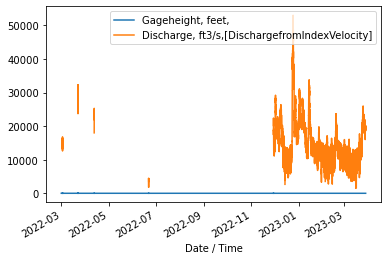

In [75]:
data.plot()

Calculate the correlation matrix for each variable



In [74]:
data.corr()

,"Gageheight, feet,","Discharge, ft3/s,[DischargefromIndexVelocity]"
"Gageheight, feet,",1.00000,0.77769
"Discharge, ft3/s,[DischargefromIndexVelocity]",0.77769,1.00000
